# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-06-24 10:24:30.150101: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 10:24:30.150747: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 10:24:30.154611: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 10:24:30.201150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 10:24:31.720671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [4]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/Base_Line_Scores(N7172)_AP(0.05-0.1-0.15-0.2-0.3-0.5)_47.npy
tma.clear_directory(text_curater="(r0)", not_text=None)

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 0 files
First 10 file names to be deleted
-------------------------------------------------
[]
<><> Cancelling Process <><>


False

In [2]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split= "random", percent_of_anchors= [0, 2, 0.8, 0.5], verbose=2, random_state= 00000)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
test.run_SPUD_tests()
#test.run_DIG_tests(predict = False)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------    SPUD Tests /iris   -------------------------------------

Operation average
        <><><><><>    File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/iris/SPUD(r0)_Ope(average)_Kin(distance)_AP)_38.npy already exists   <><><><><>
Operation abs
        <><><><><>    File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/iris/SPUD(r0)_Ope(abs)_Kin(distance)_AP)_38.npy already exists   <><><><><>


True

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As

In [2]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [3]:
df.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
662266,audiology,CwDIG,7667,random,26,0.13,0.1,None,NaN,1,NaN,0.375693,0.526316,0.280702,0.473684,0.150623
80324,breast_cancer,SSMA,1825,random,30,0.05,0.2,NaN,NaN,NaN,NaN,0.471632,0.540573,0.942857,0.966667,0.068940
61017,breast_cancer,PCR,4507,distort,72,0.11,0.15,NaN,NaN,NaN,NaN,0.278308,0.963885,0.961905,0.961905,0.685577
616373,hepatitis,DIG,1075,skewed,17,0.11,0.1,off-diagonal,0.316467,NaN,NaN,0.386211,0.601449,0.642857,0.571429,0.215238
895850,titanic,SPUD,5304,even,92,0.13,0.15,NaN,NaN,average,pure,0.438861,0.613764,0.742991,0.621495,0.174903


In [3]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1145676


 Method        Lengths
--------      ----------
 JLMA:          76290
 CwDIG:          196850
 MAGAN:          2020
 SSMA:          52320
 DTA:          57230
 Nama:          6186
 SPUD:          383000
 DIG:          346000


----------------------       Splits      ----------------------
Total data of random: 215639

 random        Lengths
--------      ----------
 MAGAN:          546
 SSMA:          5820
 CwDIG:          38450
 JLMA:          12480
 DTA:          5820
 Nama:          1043
 SPUD:          74880
 DIG:          70840


Total data of even: 218245

 even        Lengths
--------      ----------
 MAGAN:          454
 SSMA:          6190
 CwDIG:          43200
 JLMA:          17010
 DTA:          11100
 Nama:          1111
 SPUD:          66300
 DIG:         

In [69]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df, split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

array([  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515])

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [12]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

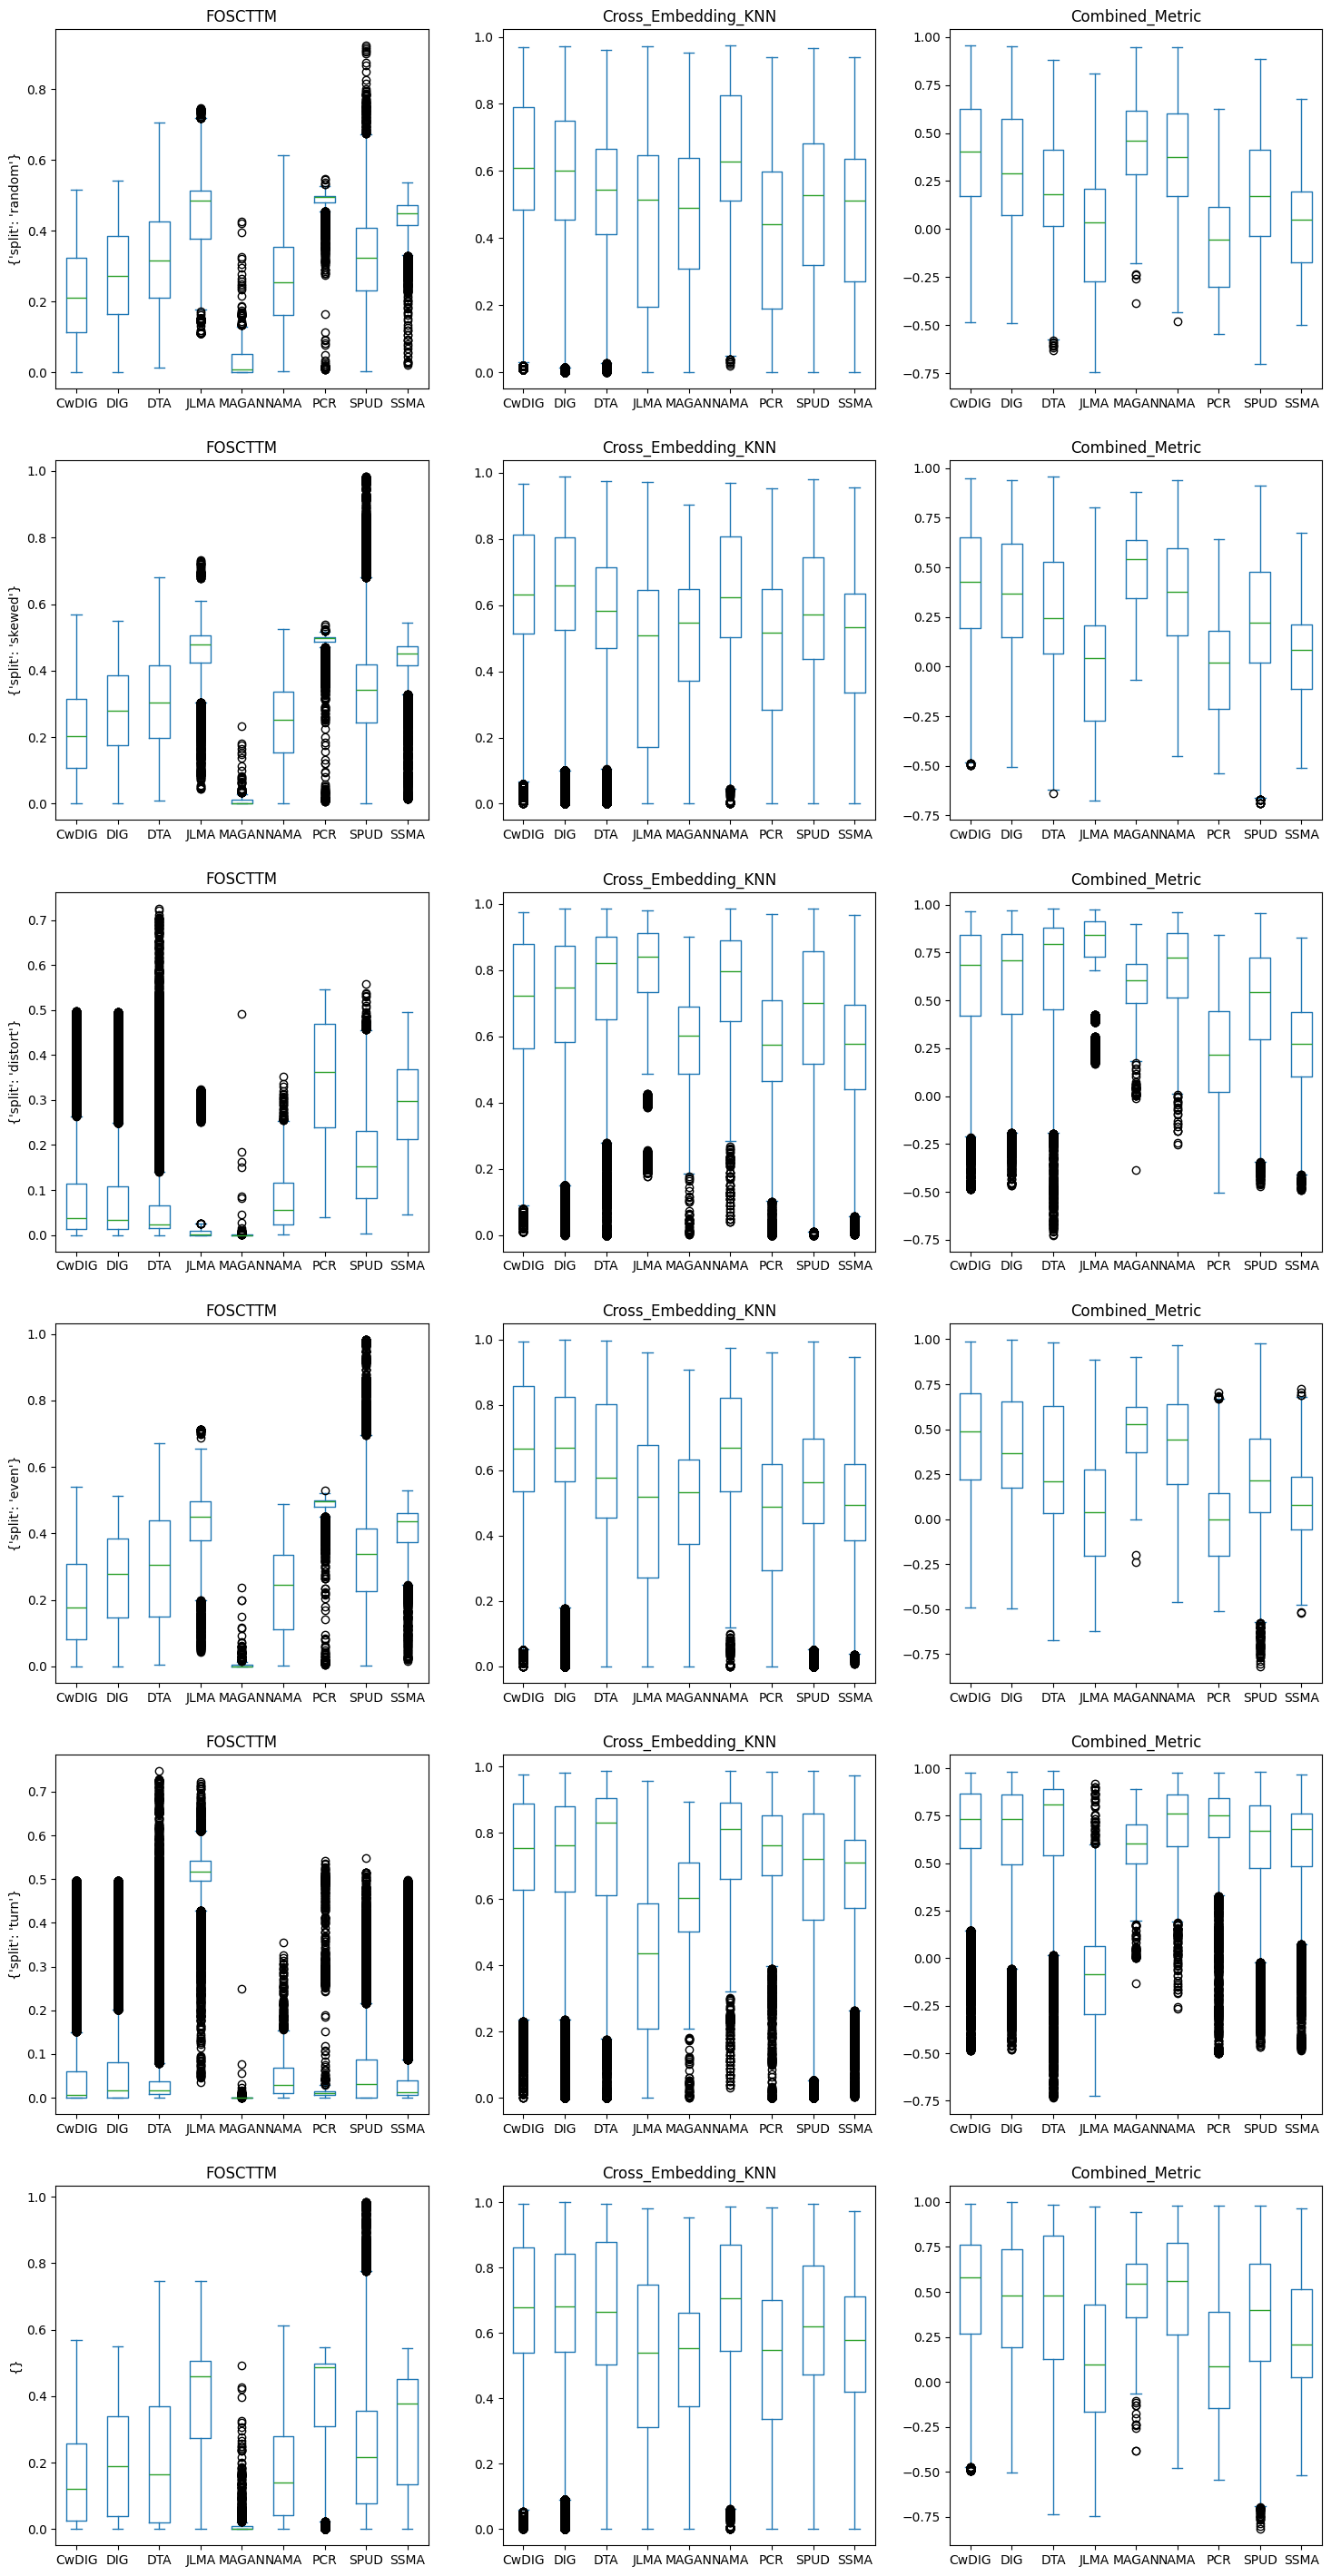

In [3]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [14]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [15]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
1138907,S-curve,DIG,8333,even,17,0.07,0.1,full,4.007931,NaN,NaN,0.103450,0.900000,0.833333,0.933333,0.796550
178326,balance_scale,DIG,654,turn,67,0.11,0.15,None,0.458724,NaN,NaN,0.002826,0.867200,0.877660,0.867021,0.864374
200443,tic-tac-toe,DIG,6299,turn,162,0.17,0.15,off-diagonal,0.513347,NaN,NaN,0.261582,0.615866,0.701389,0.701389,0.354284
628772,audiology,DIG,1738,random,30,0.15,0.15,full,0.069295,NaN,NaN,0.347078,0.173684,0.210526,0.403509,-0.173393
805279,Cancer_Data,DIG,6148,turn,74,0.13,0.1,full,0.434439,NaN,NaN,0.086718,0.936731,0.953216,0.953216,0.850013


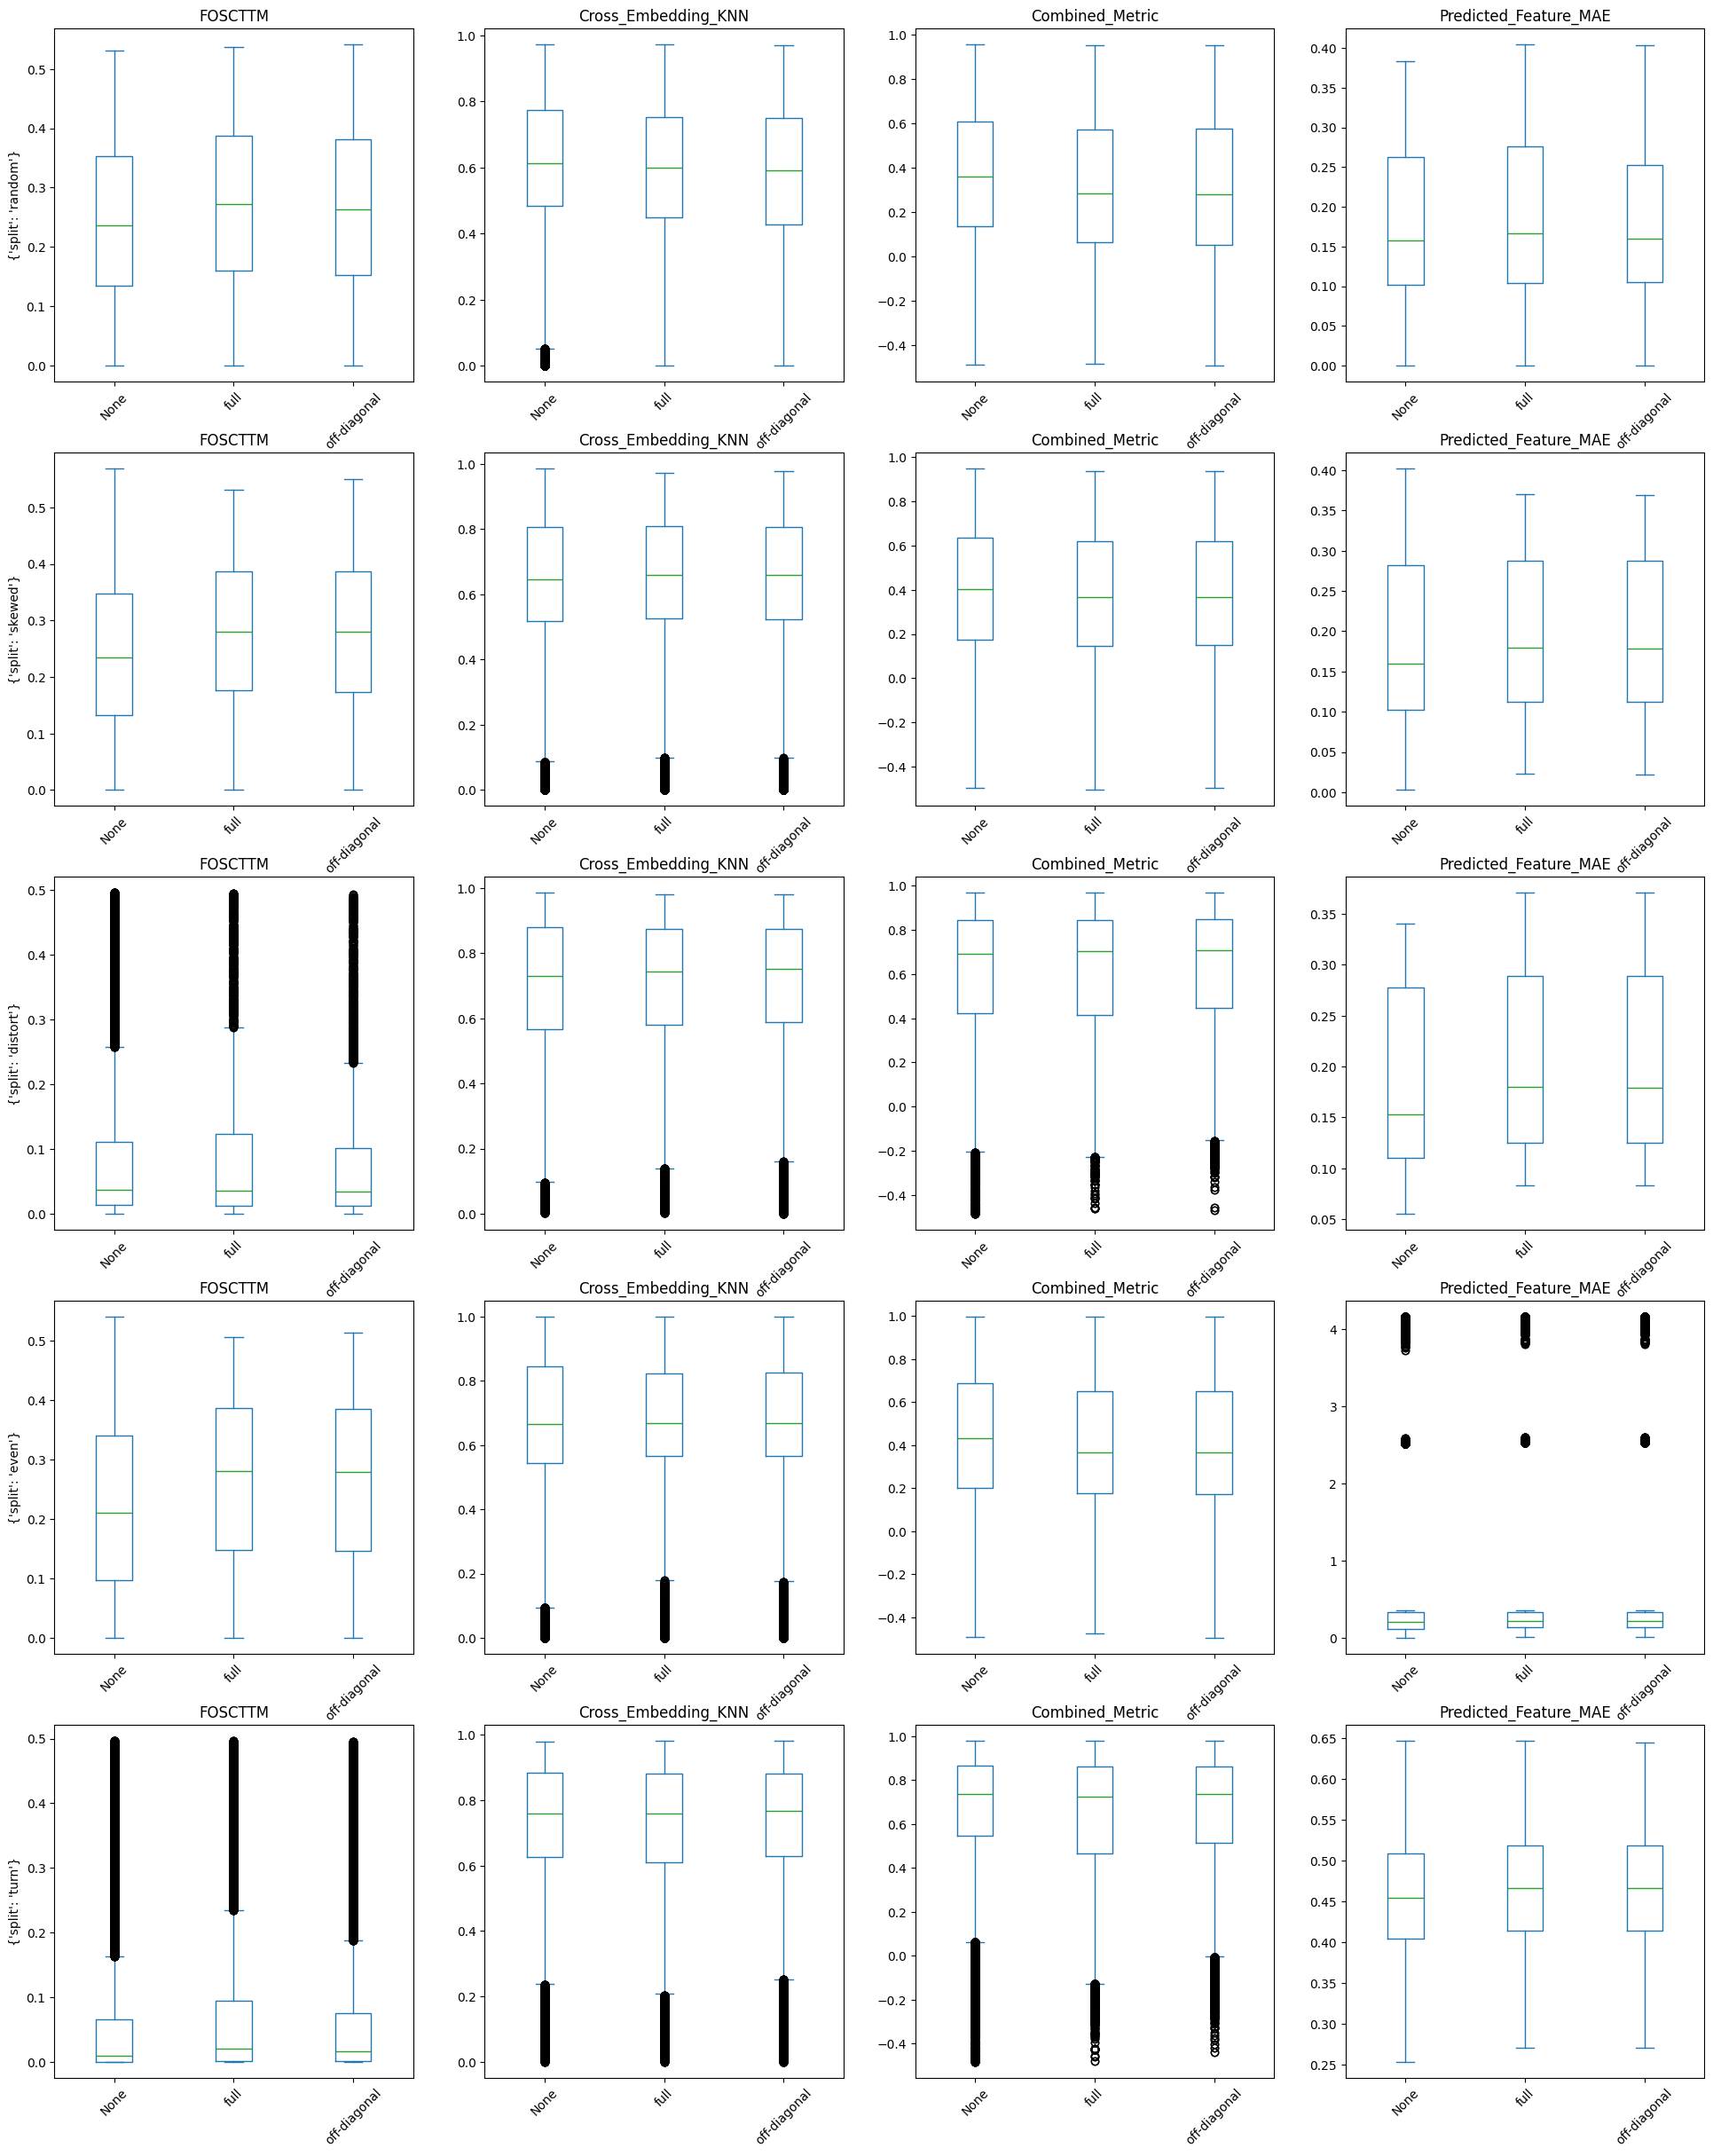

In [16]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

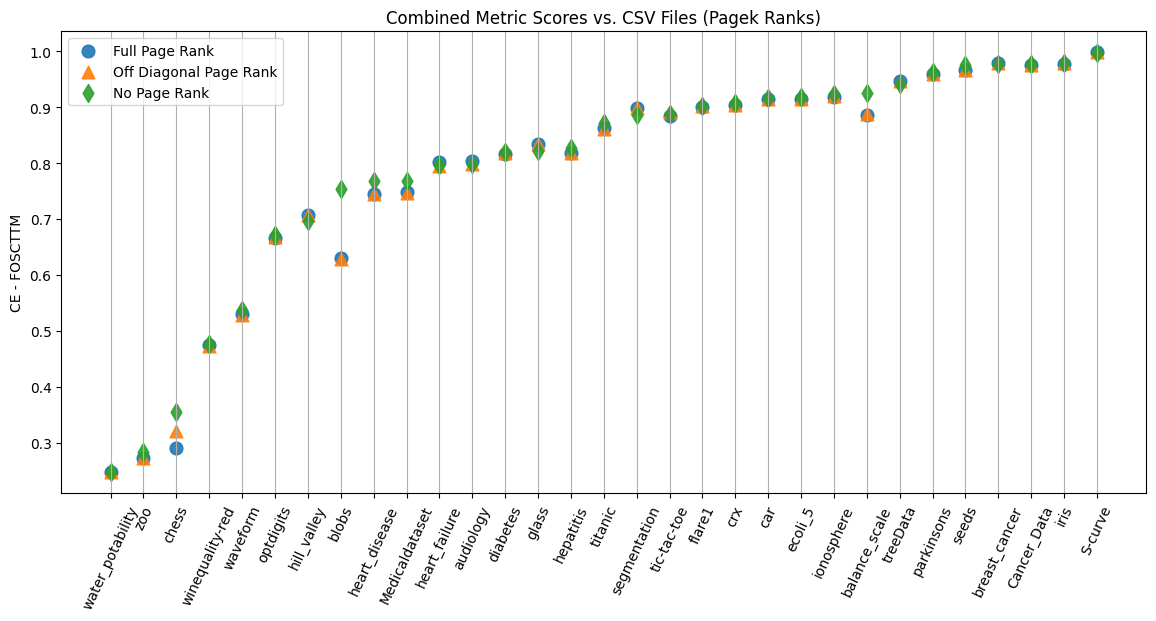

In [17]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

In [18]:
subset_df(df, method = "CwDIG")[10:20]

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
272,heart_disease,CwDIG,2830,turn,8,0.03,0.15,None,NaN,10,NaN,0.000000,0.680135,0.644444,0.644444,0.680135
273,heart_disease,CwDIG,2830,turn,8,0.03,0.5,None,NaN,10,NaN,0.000000,0.666667,0.644444,0.644444,0.666667
274,heart_disease,CwDIG,2830,turn,14,0.05,0.05,None,NaN,10,NaN,0.114523,0.555556,0.611111,0.611111,0.441032
275,heart_disease,CwDIG,2830,turn,14,0.05,0.1,None,NaN,10,NaN,0.012040,0.663300,0.611111,0.611111,0.651260
276,heart_disease,CwDIG,2830,turn,14,0.05,0.3,None,NaN,10,NaN,0.000000,0.710438,0.611111,0.611111,0.710438
277,heart_disease,CwDIG,2830,turn,14,0.05,0.2,None,NaN,10,NaN,0.000068,0.696970,0.611111,0.611111,0.696902
278,heart_disease,CwDIG,2830,turn,14,0.05,0.15,None,NaN,10,NaN,0.000000,0.683502,0.611111,0.611111,0.683502
279,heart_disease,CwDIG,2830,turn,14,0.05,0.5,None,NaN,10,NaN,0.000000,0.700337,0.611111,0.611111,0.700337
280,heart_disease,CwDIG,2830,turn,20,0.07,0.05,None,NaN,10,NaN,0.204616,0.565657,0.600000,0.600000,0.361040
281,heart_disease,CwDIG,2830,turn,20,0.07,0.1,None,NaN,10,NaN,0.020474,0.599327,0.600000,0.600000,0.578852


### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

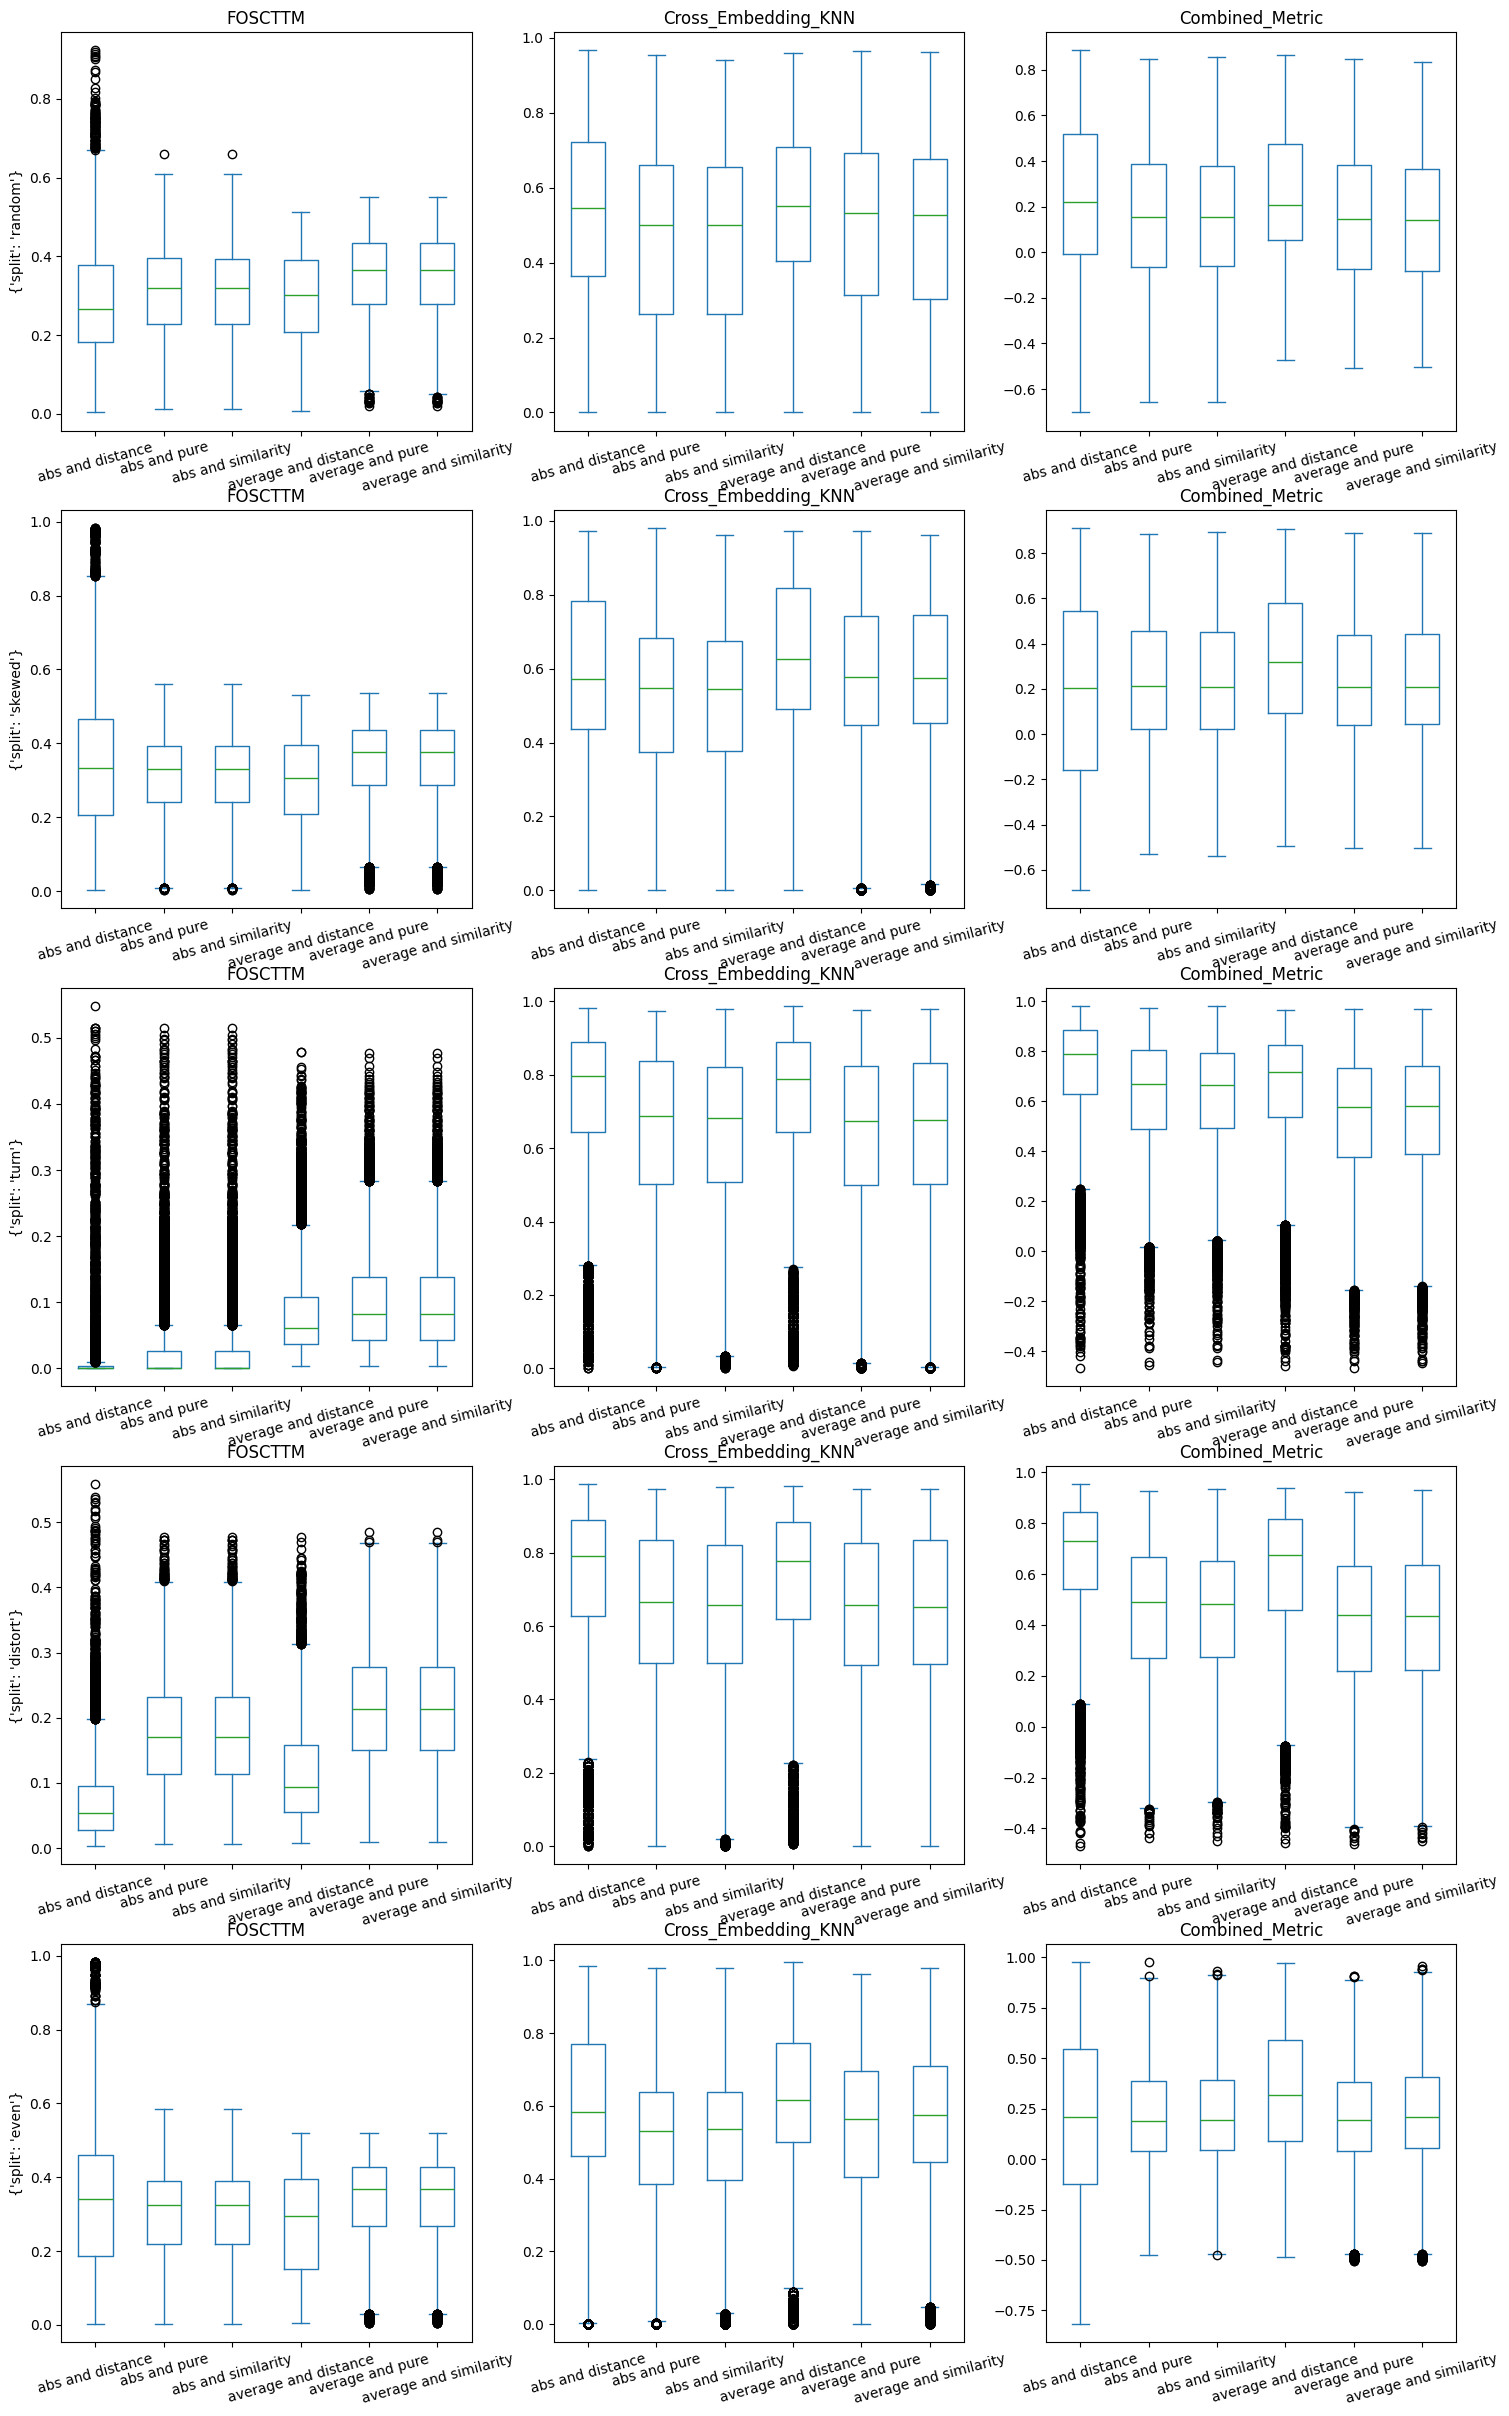

In [19]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         },
         {"split" : "distort" #, "csv_file" : "iris"
         }, 
        {"split" : "even"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [8]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
    ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    
    ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "CwDIG", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 

    ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

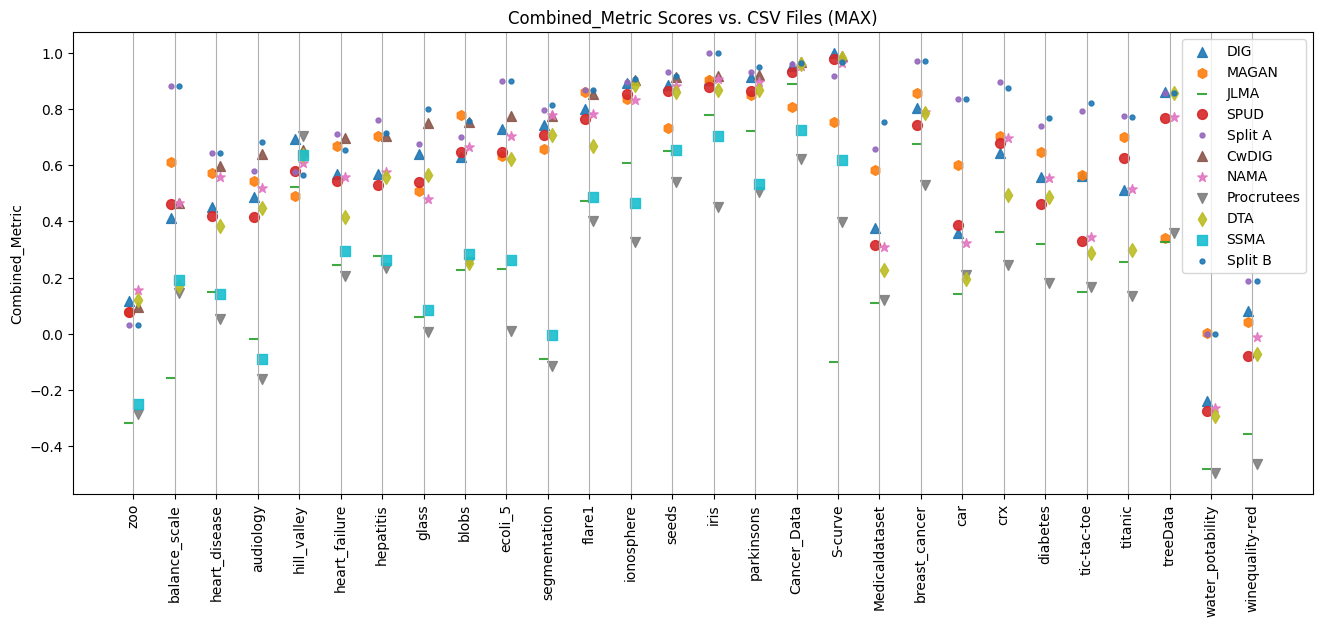

In [24]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "even"), metric = "Combined_Metric", sort_by="CwDIG")

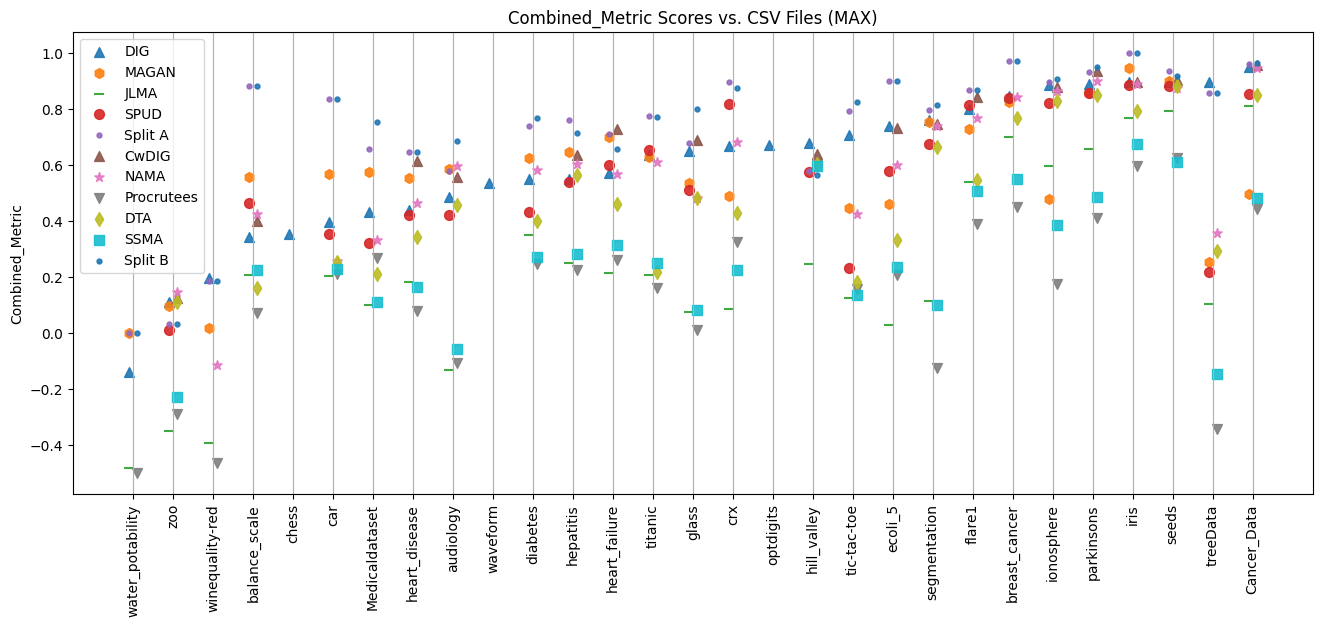

In [10]:
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), sort_by="DIG")

In [11]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

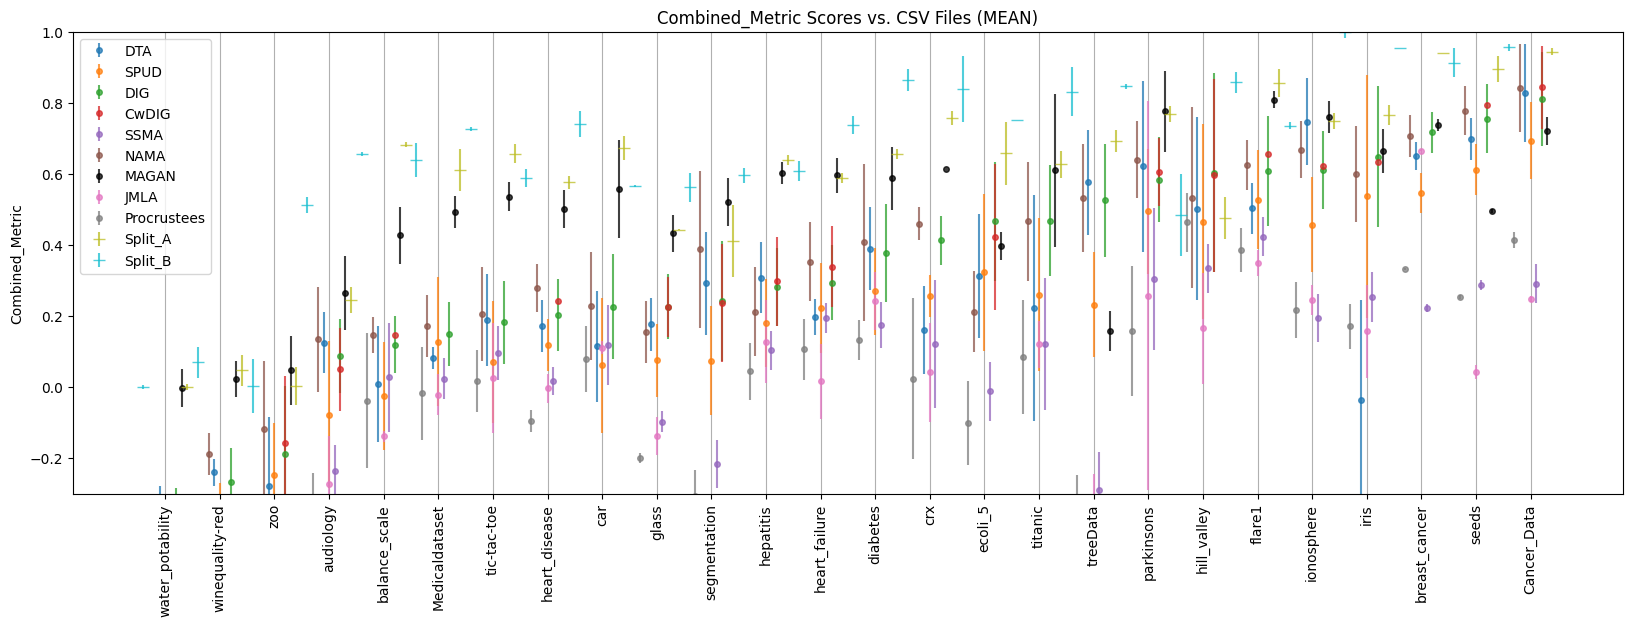

In [12]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Combined_Metric", sort_by="DIG")

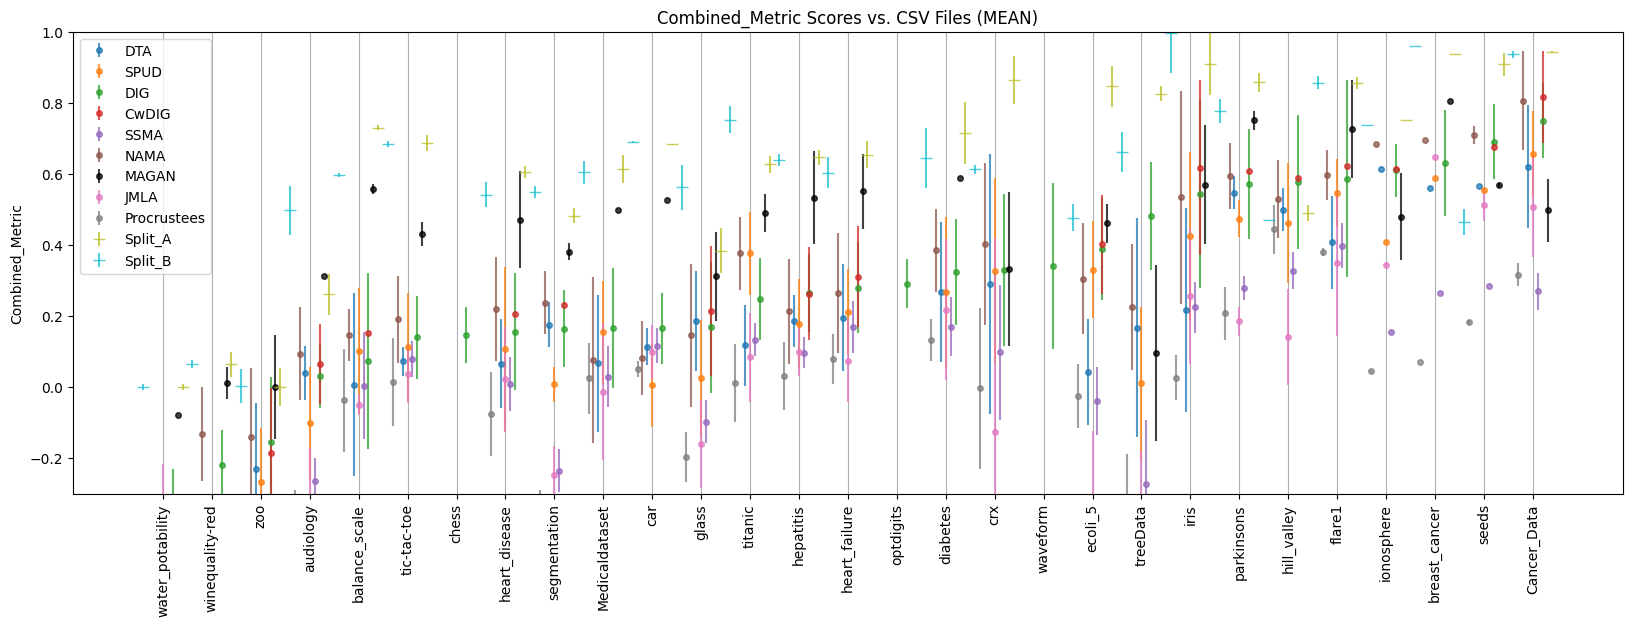

In [13]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [14]:
#Veiw the files that have mising values. We won't include them in the rankings
plt_methods_by_CSV_max(df = df, return_df=True).drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)

,SSMA,MAGAN,DTA,SPUD,DIG,CwDIG,NAMA,PCR,JLMA
0,5.0,6.0,7.0,4.0,3.0,NaN,2.0,8.0,1.0
1,4.0,8.0,2.0,5.0,3.0,6.0,7.0,1.0,9.0
2,6.0,8.0,2.0,4.0,3.0,NaN,7.0,1.0,5.0
3,3.0,9.0,6.0,7.0,2.0,4.0,5.0,1.0,8.0
4,6.0,1.0,8.0,4.0,5.0,2.0,3.0,7.0,9.0
5,8.0,9.0,1.0,6.0,3.0,4.0,5.0,2.0,7.0
6,3.0,7.0,8.0,6.0,2.0,NaN,5.0,1.0,4.0
7,9.0,8.0,1.0,7.0,3.0,4.0,5.0,6.0,2.0
8,8.0,9.0,1.0,5.0,2.0,3.0,6.0,4.0,7.0
9,2.0,9.0,1.0,7.0,3.0,5.0,8.0,4.0,6.0


In [15]:
def get_ranks(show_more = False, **kwargs):
    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()
    df_ranked = csv_df.rank(ascending=False, method='max', axis = 1)

    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Get the csv file with Cross embedding as the max
    csv_df2 = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").dropna()
    d1 = len(csv_df2)
    columns = csv_df2.columns[1:-2]

    #Add their Overall value
    print(f"\n  Combined Metric Scores\n------------------------------------------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    #Drop the SPlits from the df
    methods_df = csv_df2.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df2.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values and print their rank underneath
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,9)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy(), axis = 0), newshape = (1,9)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df2["csv_file"]))



In [16]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks(show_more = False)

Ranked across No Split
-----------------------
DTA      2.388889
DIG      3.277778
CwDIG    4.055556
SPUD     4.666667
PCR      4.944444
NAMA     5.777778
JLMA     5.888889
SSMA     6.500000
MAGAN    7.611111
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA     SPUD       DIG     CwDIG      NAMA  \
0  0.743893  0.750874  0.834329  0.81943  0.837459  0.832761  0.815432   
0  8.000000  7.000000  2.000000  4.00000  1.000000  3.000000  5.000000   

        PCR      JLMA  
0  0.779389  0.729744  
0  6.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     CwDIG      NAMA  \
0 -0.002641 -0.031434  0.086485  0.062412  0.070552  0.064066  0.059306   
0       8.0       9.0       1.0       4.0       2.0       3.0       5.0   

In [17]:
get_ranks(split = "random", seed = 2830) #Seeds:  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515

Ranked across random Split
-----------------------
CwDIG    2.0
MAGAN    2.6
DIG      3.7
SPUD     4.2
NAMA     4.5
DTA      4.6
SSMA     7.0
PCR      8.1
JLMA     8.3
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG   CwDIG      NAMA  \
0  0.146065  0.526272  0.426818  0.451957  0.484667  0.5876  0.438769   
0  7.000000  2.000000  6.000000  4.000000  3.000000  1.0000  5.000000   

        PCR     JLMA  
0  0.050865 -0.02251  
0  8.000000  9.00000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA     SPUD       DIG     CwDIG      NAMA  \
0 -0.201932 -0.192184 -0.129414 -0.11436 -0.085371 -0.059154 -0.139649   
0       7.0       6.0       4.0      3.0       2.0       1.0       5.0   

        PCR      JLMA  
0 -0.221895 -0.318457  


In [18]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
CwDIG    1.666667
DIG      3.000000
NAMA     3.444444
MAGAN    4.055556
DTA      4.722222
SPUD     4.888889
SSMA     7.166667
JLMA     7.777778
PCR      8.277778
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     CwDIG     NAMA  \
0  0.334017  0.666418  0.609571  0.649881  0.688093  0.742655  0.68278   
0  7.000000  4.000000  6.000000  5.000000  2.000000  1.000000  3.00000   

        PCR      JLMA  
0  0.238629  0.286007  
0  9.000000  8.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA      SPUD       DIG     CwDIG      NAMA  \
0 -0.12482 -0.111084 -0.026346 -0.015038  0.009473  0.013487 -0.008921   
0      7.0       6.0       5.0       4.0       2.0       1.0       3.0   


In [19]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
CwDIG    2.466667
DIG      2.866667
NAMA     3.066667
MAGAN    3.400000
SPUD     4.466667
DTA      4.866667
SSMA     7.333333
JLMA     7.866667
PCR      8.666667
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     CwDIG     NAMA  \
0  0.307704  0.643266  0.579349  0.631345  0.669363  0.691292  0.65273   
0  7.000000  4.000000  6.000000  5.000000  2.000000  1.000000  3.00000   

        PCR      JLMA  
0  0.198107  0.218101  
0  9.000000  8.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     CwDIG      NAMA  \
0 -0.110987 -0.126263 -0.030965 -0.016547  0.016072 -0.010183 -0.020793   
0       6.0       7.0       5.0       3.0       1.0       2.0       4.

In [20]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA      1.5000
DIG      3.4375
JLMA     3.5625
CwDIG    4.2500
NAMA     4.2500
SPUD     4.6875
MAGAN    6.7500
PCR      8.2500
SSMA     8.3125
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA    MAGAN      DTA      SPUD       DIG    CwDIG      NAMA  \
0  0.566424  0.69841  0.84068  0.788597  0.802157  0.79848  0.790326   
0  8.000000  7.00000  1.00000  6.000000  2.000000  4.00000  5.000000   

        PCR      JLMA  
0  0.563499  0.800032  
0  9.000000  3.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     CwDIG      NAMA  \
0 -0.068693 -0.072142  0.090266  0.044768  0.046626  0.034441  0.039968   
0       8.0       9.0       1.0       4.0       2.0       6.0       5.0   

        PCR      

In [21]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA      1.600000
DIG      3.066667
CwDIG    3.933333
SPUD     4.000000
PCR      4.200000
SSMA     5.866667
NAMA     5.933333
MAGAN    7.666667
JLMA     8.866667
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA     SPUD      DIG     CwDIG      NAMA  \
0  0.787364  0.730566  0.870132  0.83311  0.84891  0.838629  0.820232   
0  7.000000  8.000000  1.000000  5.00000  2.00000  4.000000  6.000000   

        PCR      JLMA  
0  0.841422  0.395557  
0  3.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA      SPUD       DIG     CwDIG      NAMA  \
0  0.00864 -0.057881  0.100807  0.054524  0.061951  0.049419  0.044415   
0      7.0       8.0       1.0       4.0       2.0       5.0       6.0   

  

## Comparing Parameters across all methods

### KNN and Percent of Anchors

In [33]:
def line_plot_methods(argument = "Percent_of_Anchors", metric = "Combined_Metric",   **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)[metric].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)[metric].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)[metric].mean(), label = "DIG")
    plt.plot(df_subset[df_subset["method"] == "CwDIG"].groupby(argument)[metric].mean(), label = "CwDIG")
    plt.plot(df_subset[df_subset["method"] == "JLMA"].groupby(argument)[metric].mean(), label = "JLMA")
    plt.plot(df_subset[df_subset["method"] == "MAGAN"].groupby(argument)[metric].mean(), label = "MAGAN")
    plt.plot(df_subset[df_subset["method"] == "PCR"].groupby(argument)[metric].mean(), label = "Procrustees")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)[metric].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)[metric].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)[metric].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel(metric)
    plt.legend()
    plt.title("Methods Together")

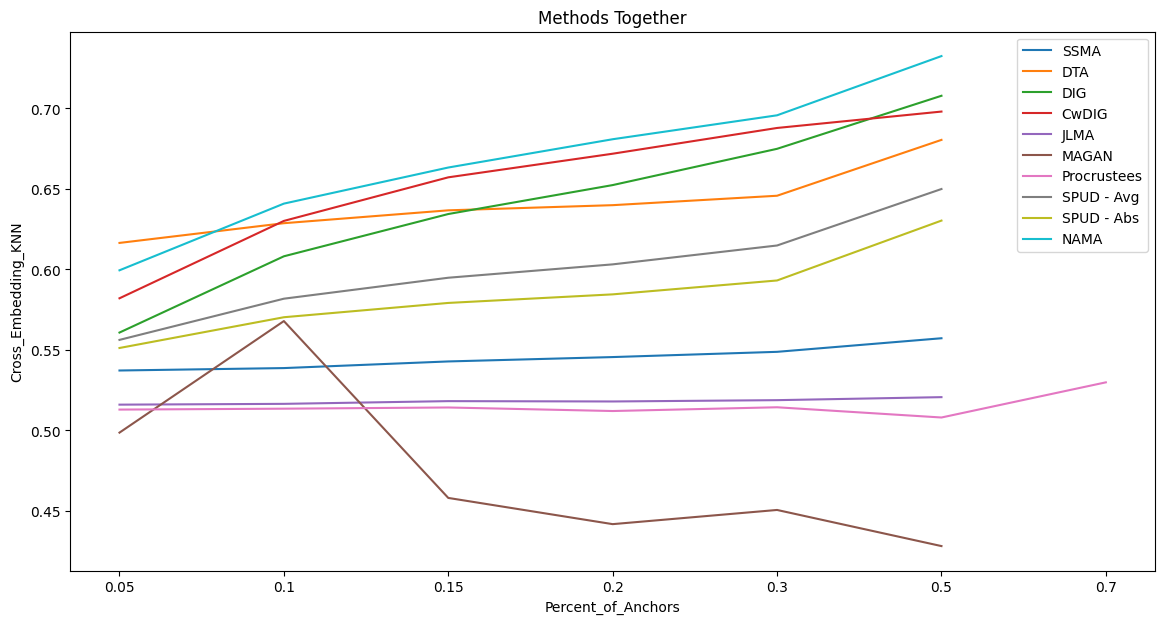

In [34]:
line_plot_methods(metric = "Cross_Embedding_KNN")

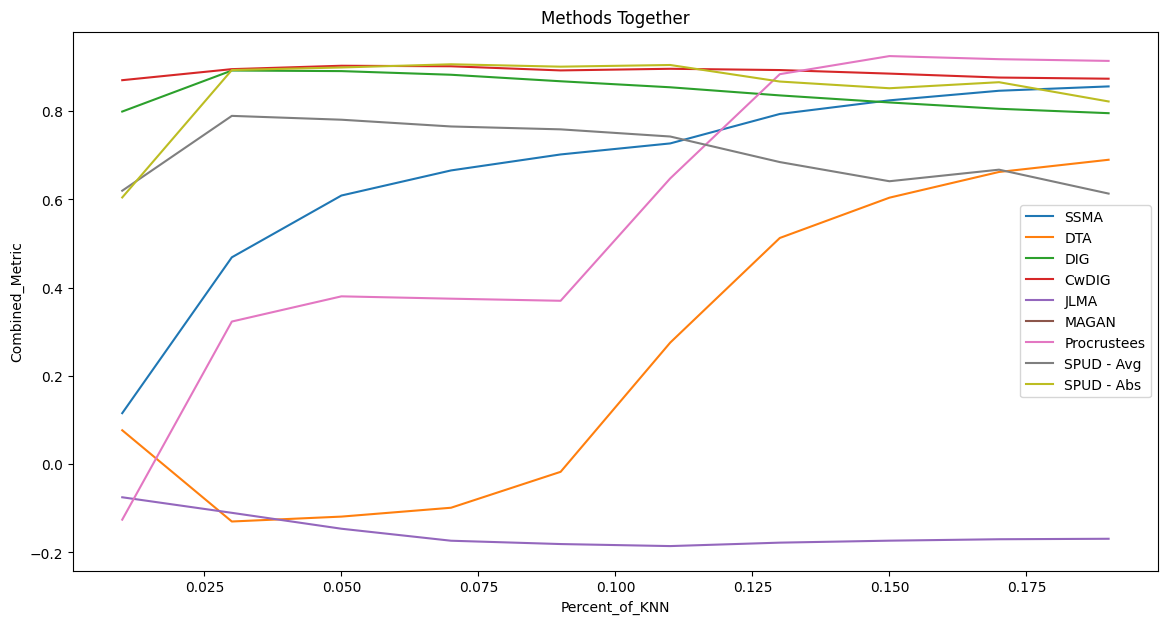

In [35]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

### Sparse Data comparison

#### Set Up

In [40]:
from SPUD import SPUD
from DIG import DIG
import random

In [53]:
sparse_dc = tma.test_manifold_algorithms(csv_file="iris.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)

#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [42]:
sparse_dc.anchors

array([[  0, 128],
       [  1,  45],
       [  2, 129],
       [  3,  27],
       [  4,  76],
       [  5,  50],
       [  6,  39],
       [  7,  95],
       [  8,  41],
       [  9, 138],
       [ 10, 135],
       [ 11,   0],
       [ 12,  82],
       [ 13, 125],
       [ 14,   4]])

#### Sparse DIG

In [43]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 10)

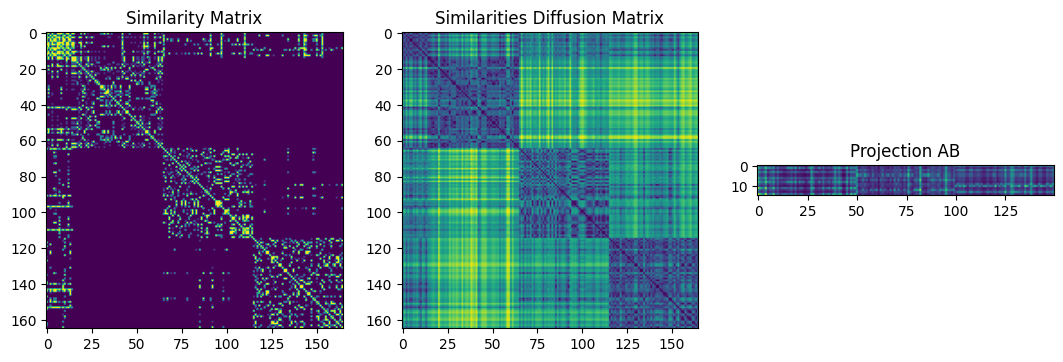

In [44]:
sparse_DIG.plot_graphs()

Model Stress: 50.552011694463786
Cross Embedding: 0.94
Can't compute FOSCTTM with different domain shapes.


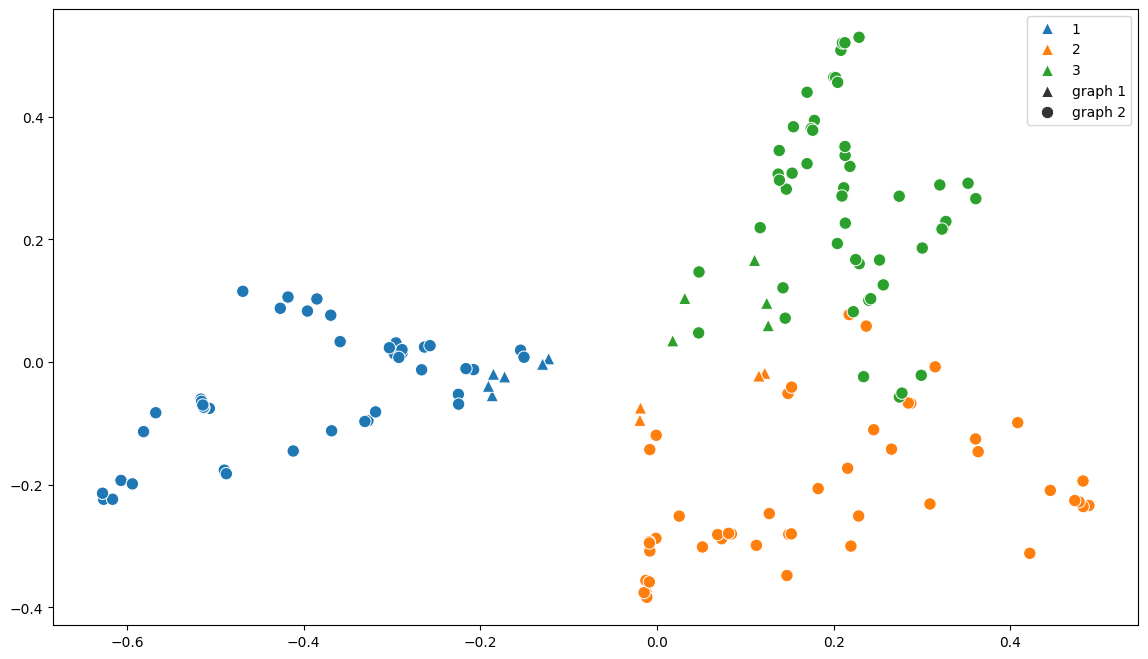

In [45]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

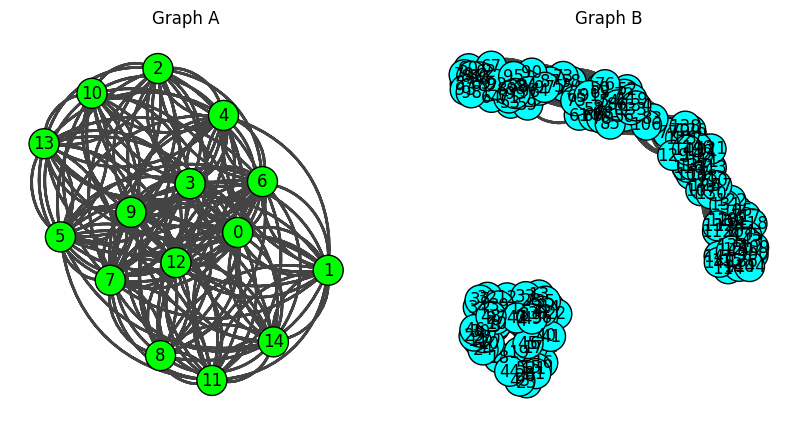

In [46]:
sparse_spud = SPUD(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "average", knn = 10)
sparse_spud.plot_graphs()

Model Stress: 17.890672826451
Cross Embedding: 0.8733333333333333
Can't compute FOSCTTM with different domain shapes.


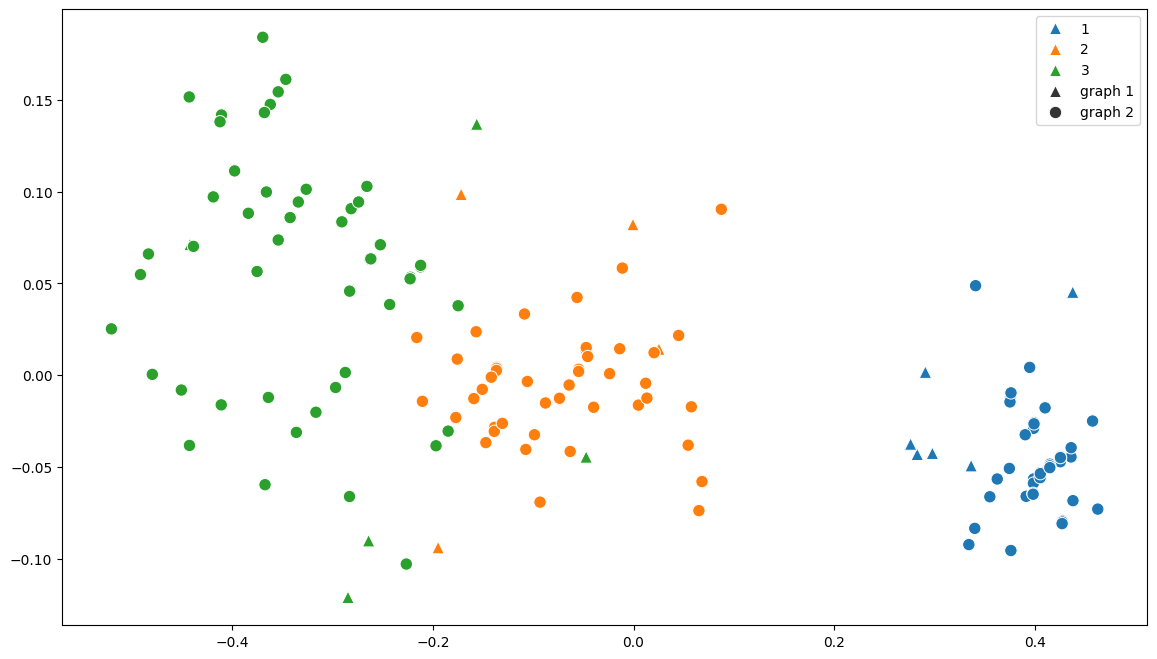

In [47]:
sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [36]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 2 and 32, 6 and 82, 26 and 66, 31 and 80, 31 and 90, 33 and 127, 38 and 291, 80 and 90. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 25 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 40 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 66 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings

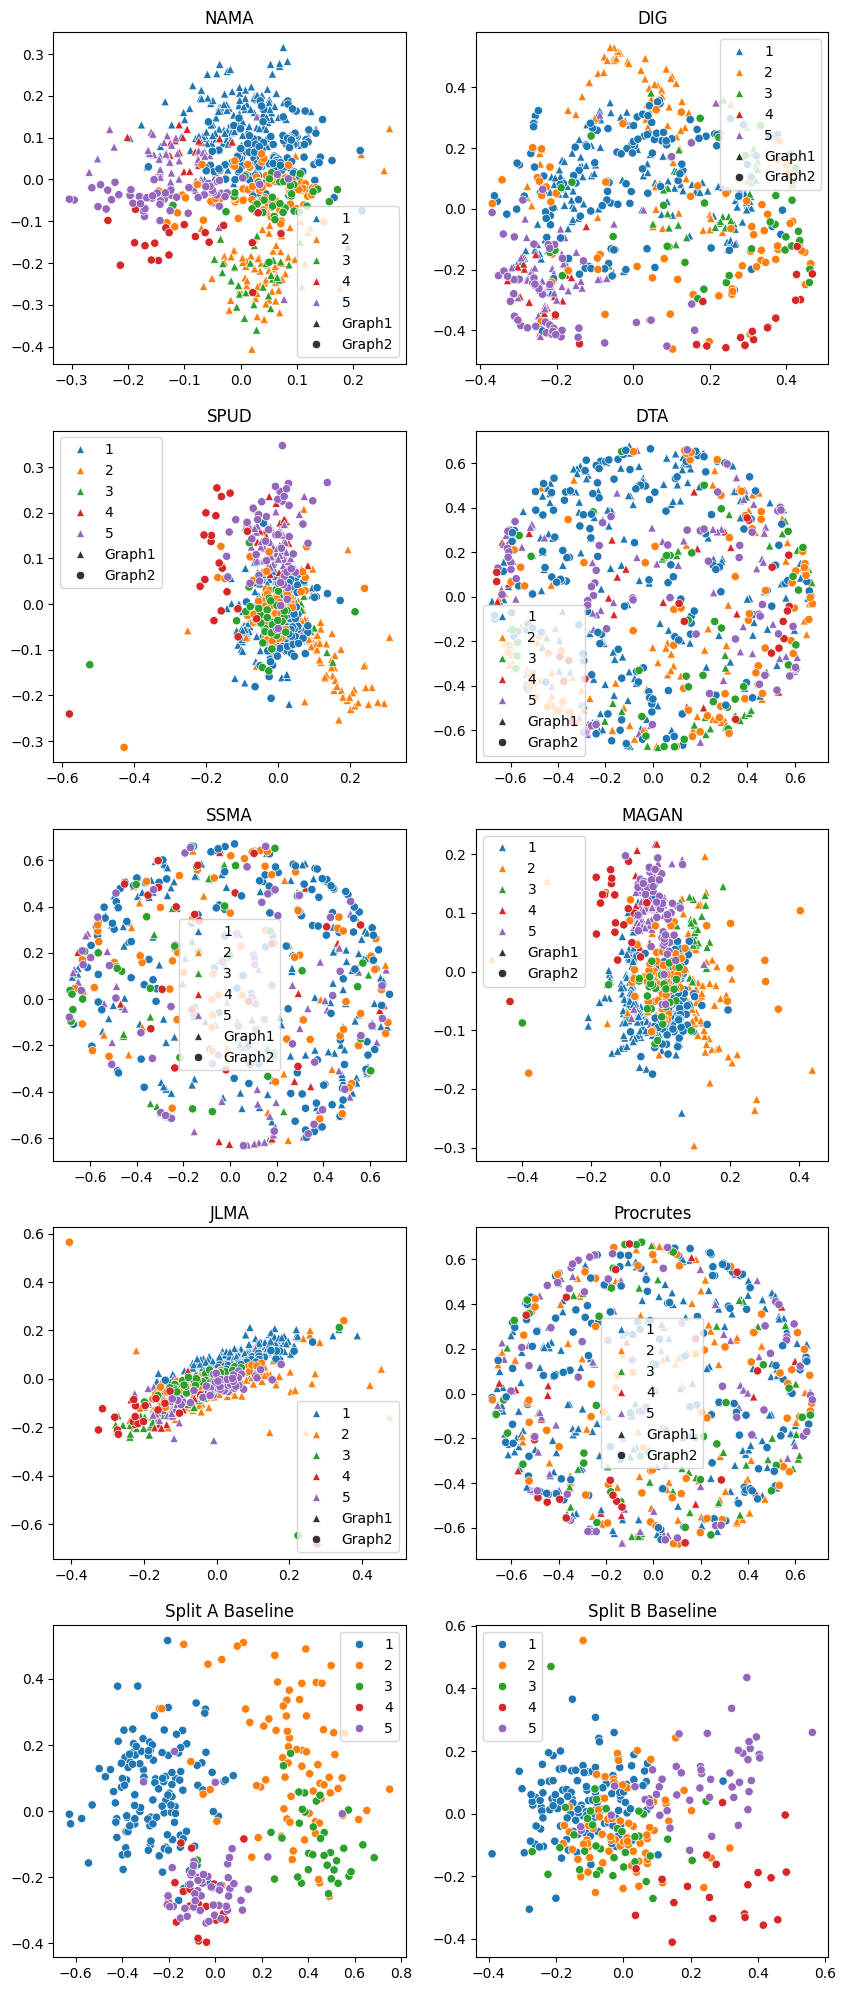

In [37]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [55]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df)

    #Count Instances
    instance_dict[csv_file] = len(df.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df) * len(df.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv,chess.csv,optdigits.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006,2198.150119,2975.556961
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593,1271.707261,2712.52794
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673,1721.018906,2350.375657
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771,1741.178858,2519.571152
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093,46112.782603,85038.966415
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618,1225.276301,61.125
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0,3196.0,3823.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0,37.0,65.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0,118252.0,248495.0


In [56]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7      21.433333
5     146.407922
1     234.785702
3     281.642362
2     287.123525
0     309.506167
6          820.4
4    5526.709339
8        23313.5
dtype: object